## H2O.ai

"H2O from Python is a tool for rapidly turning over models, doing data manipulation, and building applications in a fast, scalable environment without any of the mental anguish about parallelism and distribution of work." ~H2O.ai

"H2O contains good default values for many datasets, but to get the best performance for your data you will want to tune at least some of these hyperparameters to maximize the predictive performance of your models."
~ H2O.ai

H2O.ai streamline development and is faster to train the models compared to scikit-learn


In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=3f63302ee34f4abc8ecbf6b7b8542f480c4c40e54874dcc0daf36544b3edc784
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


## AutoML Framework

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = -1, max_mem_size = 8)
h2o.connect()

train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")


x = train.columns # defining the column names for x
y = "response" # column name for y (target variable)
x.remove(y)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx52mqre6
  JVM stdout: /tmp/tmpx52mqre6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx52mqre6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 13 hours and 4 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_kc5bus
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 13 hours and 4 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_kc5bus
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
1,0.869293,-0.635082,0.22569,0.32747,-0.689993,0.754202,-0.248573,-1.09206,0,1.37499,-0.653674,0.930349,1.10744,1.1389,-1.5782,-1.04699,0,0.65793,-0.0104546,-0.0457672,3.10196,1.35376,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.49797,-0.31301,1.09553,-0.557525,-1.58823,2.17308,0.812581,-0.213642,1.27101,2.21487,0.499994,-1.26143,0.732156,0,0.398701,-1.13893,-0.00081911,0,0.30222,0.833048,0.9857,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.47064,-1.63597,0.453773,0.425629,1.10487,1.28232,1.38166,0,0.851737,1.54066,-0.81969,2.21487,0.99349,0.35608,-0.208778,2.54822,1.25695,1.12885,0.900461,0,0.909753,1.10833,0.985692,0.951331,0.803252,0.865924,0.780118
0,1.34438,-0.876626,0.935913,1.99205,0.882454,1.78607,-1.64678,-0.942383,0,2.42326,-0.676016,0.736159,2.21487,1.29872,-1.43074,-0.364658,0,0.745313,-0.678379,-1.36036,0,0.946652,1.0287,0.998656,0.728281,0.8692,1.02674,0.957904
1,1.10501,0.321356,1.5224,0.882808,-1.20535,0.681466,-1.07046,-0.921871,0,0.800872,1.02097,0.971407,2.21487,0.596761,-0.350273,0.631194,0,0.479999,-0.373566,0.113041,0,0.755856,1.36106,0.98661,0.838085,1.1333,0.872245,0.808487
0,1.59584,-0.607811,0.00707492,1.81845,-0.111906,0.84755,-0.566437,1.58124,2.17308,0.755421,0.64311,1.42637,0,0.921661,-1.19043,-1.61559,0,0.651114,-0.654227,-1.27434,3.10196,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
1,0.409391,-1.88468,-1.02729,1.67245,-1.6046,1.33801,0.0554274,0.0134659,2.17308,0.509783,-1.03834,0.707862,0,0.746918,-0.358465,-1.64665,0,0.367058,0.0694965,1.37713,3.10196,0.869418,1.22208,1.00063,0.545045,0.698653,0.977314,0.828786
1,0.933895,0.62913,0.527535,0.238033,-0.966569,0.547811,-0.0594392,-1.70687,2.17308,0.941003,-2.65373,-0.15722,0,1.03037,-0.175505,0.523021,2.54822,1.37355,1.29125,-1.46745,0,0.901837,1.08367,0.979696,0.7833,0.849195,0.894356,0.774879
1,1.40514,0.536603,0.689554,1.17957,-0.110061,3.2024,-1.52696,-1.57603,0,2.93154,0.567342,-0.130033,2.21487,1.78712,0.899499,0.585151,2.54822,0.401865,-0.151202,1.16349,0,1.66707,4.03927,1.17583,1.04535,1.54297,3.53483,2.74075
1,1.17657,0.104161,1.397,0.479721,0.265513,1.13556,1.53483,-0.253291,0,1.02725,0.534316,1.18002,0,2.40566,0.0875568,-0.976534,2.54822,1.25038,0.268541,0.530334,0,0.833175,0.773968,0.98575,1.1037,0.84914,0.937104,0.812364


H2O AutoML uses a set of candidate models to train and tune on the given dataset. A below example shows this:

In [ ]:
# For binary classification, response should be a factor. This is telling H2O that this is a categorical variable
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),18/20
# GBM base models (used / total),6/7
# XGBoost base models (used / total),6/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),3/4
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20230331_42217,0.788862,0.550509,0.807785,0.323583,0.432178,0.186778
StackedEnsemble_BestOfFamily_1_AutoML_1_20230331_42217,0.787949,0.551723,0.806742,0.315479,0.432635,0.187173
GBM_1_AutoML_1_20230331_42217,0.782177,0.557734,0.800457,0.328058,0.435367,0.189544
GBM_2_AutoML_1_20230331_42217,0.77971,0.560845,0.798129,0.332059,0.436651,0.190664
GBM_5_AutoML_1_20230331_42217,0.778805,0.561756,0.796787,0.334326,0.437108,0.191063
GBM_grid_1_AutoML_1_20230331_42217_model_2,0.77786,0.564655,0.795359,0.33376,0.438088,0.191921
GBM_3_AutoML_1_20230331_42217,0.774951,0.565286,0.794951,0.3354,0.438932,0.192661
XGBoost_3_AutoML_1_20230331_42217,0.770507,0.572564,0.790167,0.352632,0.441891,0.195268
GBM_4_AutoML_1_20230331_42217,0.769913,0.570673,0.787941,0.34322,0.441434,0.194864
XGBoost_grid_1_AutoML_1_20230331_42217_model_3,0.769315,0.574545,0.78754,0.337774,0.443133,0.196367


In [ ]:
# The leader model is stored here
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),18/20
# GBM base models (used / total),6/7
# XGBoost base models (used / total),6/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),3/4
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
preds

predict,p0,p1
0,0.708984,0.291016
0,0.694034,0.305966
1,0.557035,0.442965
1,0.303269,0.696731
0,0.754674,0.245326
1,0.251186,0.748814
1,0.322207,0.677793
1,0.63757,0.36243
1,0.592067,0.407933
0,0.742677,0.257323


In [ ]:
perf = aml.leader.model_performance(test)
perf.auc()

0.7945800000804405

## Hyperparameter Optimization

### GridSearch

"Grid search … typically finds a better [set of hyperparameters] than purely manual sequential optimization (in the same amount of time)" ~H2O.ai

In [ ]:
# Begin with a random search of a space of 6 * 5 = 30 possible models:
hyper_parameters = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9],
                     'lambda': [1e-4,1e-5,1e-6,1e-7,1e-8] }


from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
model_grid_search = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', nfolds=5),
      hyper_parameters,
      grid_id="random_plus_manual")

model_grid_search.train(x=x,y=y, training_frame=train)


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.9/dist-packages/h2o/grid/grid_search.py:431: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


,alpha,lambda,model_ids,logloss
,0.9,1e-07,random_plus_manual_model_24,0.6380796
,0.3,1e-08,random_plus_manual_model_27,0.6380956
,0.1,1e-07,random_plus_manual_model_20,0.6382527
,0.3,1e-06,random_plus_manual_model_15,0.6382656
,0.1,1e-05,random_plus_manual_model_8,0.6383351
,0.3,1e-05,random_plus_manual_model_9,0.6384641
,0.9,0.0001,random_plus_manual_model_6,0.6384852
,0.9,1e-06,random_plus_manual_model_18,0.6384905
,0.01,0.0001,random_plus_manual_model_1,0.6385229
,0.1,1e-06,random_plus_manual_model_14,0.6385895


In [ ]:
model_grid_search_perf = model_grid_search.get_grid(sort_by='auc', decreasing=True)
model_grid_search_perf

,alpha,lambda,model_ids,auc
,0.9,1e-07,random_plus_manual_model_24,0.6838966
,0.3,1e-08,random_plus_manual_model_27,0.6836606
,0.1,1e-05,random_plus_manual_model_8,0.6835619
,0.3,1e-05,random_plus_manual_model_9,0.6835175
,0.1,1e-07,random_plus_manual_model_20,0.6833975
,0.1,0.0001,random_plus_manual_model_2,0.6833767
,0.5,0.0001,random_plus_manual_model_4,0.6833634
,0.3,1e-07,random_plus_manual_model_21,0.6832101
,0.1,1e-06,random_plus_manual_model_14,0.6831627
,0.3,1e-06,random_plus_manual_model_15,0.6831621


### RandomSearch

In [ ]:
# Begin with a random search of a space of 6 * 5 = 30 possible models:
hyper_parameters = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9],
                     'lambda': [1e-4,1e-5,1e-6,1e-7,1e-8] }


search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
                    'stopping_tolerance': 0.001,
                    'max_models': 10,
                   'max_runtime_secs': 120}

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
model_grid_search = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', nfolds=5),
      hyper_parameters,
      grid_id="random_plus_manual")

model_grid_search.train(x=x,y=y, training_frame=train)


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,alpha,lambda,model_ids,logloss
,0.9,1e-07,random_plus_manual_model_24,0.6380796
,0.3,1e-08,random_plus_manual_model_27,0.6380956
,0.1,1e-07,random_plus_manual_model_20,0.6382527
,0.3,1e-06,random_plus_manual_model_15,0.6382656
,0.1,1e-05,random_plus_manual_model_8,0.6383351
,0.3,1e-05,random_plus_manual_model_9,0.6384641
,0.9,0.0001,random_plus_manual_model_6,0.6384852
,0.9,1e-06,random_plus_manual_model_18,0.6384905
,0.01,0.0001,random_plus_manual_model_1,0.6385229
,0.1,1e-06,random_plus_manual_model_14,0.6385895


In [ ]:
model_grid_search_perf = model_grid_search.get_grid(sort_by='auc', decreasing=True)
model_grid_search_perf

,alpha,lambda,model_ids,auc
,0.9,1e-07,random_plus_manual_model_24,0.6838966
,0.3,1e-08,random_plus_manual_model_27,0.6836606
,0.1,1e-05,random_plus_manual_model_8,0.6835619
,0.3,1e-05,random_plus_manual_model_9,0.6835175
,0.1,1e-07,random_plus_manual_model_20,0.6833975
,0.1,0.0001,random_plus_manual_model_2,0.6833767
,0.5,0.0001,random_plus_manual_model_4,0.6833634
,0.3,1e-07,random_plus_manual_model_21,0.6832101
,0.1,1e-06,random_plus_manual_model_14,0.6831627
,0.3,1e-06,random_plus_manual_model_15,0.6831621


## Model Checkpointing in H2O

In [ ]:
import h2o

from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o.init()

# Import the mnist dataset
mnist_original = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/bigdata/laptop/mnist/test.csv.gz")
# The last column, C785, is the target that lists whether the
# handwritten digit was a 0,1,2,3,4,5,6,7,8, or 9. Before we
# set the variables for our predictors and target, we will
# convert our target column from type int to type enum.
mnist_original['C785'] = mnist_original['C785'].asfactor()
predictors = mnist_original.columns[0:-1]
target = 'C785'

# Split the data into training and validation sets, and split
# a piece off to demonstrate adding new data with checkpointing.
# In a real world scenario, however, you would not have your
# new data at this point.
train, valid, new_data = mnist_original.split_frame(ratios=[.7, .15], seed=1234)

# Build the first deep learning model, specifying the model_id so you
# can indicate which model to use when you want to continue training.
# We will use 4 epochs to start off with and then build an additional
#  epochs with checkpointing.
dl = H2ODeepLearningEstimator(distribution='multinomial',
                              model_id='dl',
                              epochs=4,
                              activation='rectifier_with_dropout',
                              hidden=[200,200,200],
                              rate = 1e-3,
                              hidden_dropout_ratios=[0.2,0.2,0],
                              seed=1234)
dl.train(x=predictors, y=target, training_frame=train, validation_frame=valid)

print('Validation Mean Per Class Error for DL:', dl.mean_per_class_error(valid=True))

print('Validation Logloss for DL:', dl.logloss(valid=True))


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,18 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 13 hours and 22 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_kc5bus
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.936 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |

/usr/local/lib/python3.9/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [C645, C644, C762, C365, C761, C364, C760, C51, C50, C53, C52, C55, C54, C57, C56, C59, C58, C779, C533, C60, C61, C703, C702, C701, C700, C1, C422, C2, C421, C784, C3, C420, C783, C4, C782, C5, C781, C6, C780, C7, C141, C8, C140, C9, C675, C674, C673, C672, C394, C393, C392, C82, C84, C83, C86, C85, C88, C87, C729, C728, C727, C726, C449, C169, C168, C561, C11, C10, C13, C12, C618, C15, C617, C14, C616, C17, C16, C19, C18, C337, C733, C699, C732, C731, C730, C450, C170, C20, C22, C21, C24, C23, C26, C25, C28, C505, C27, C29, C589, C225, C588, C31, C30, C33, C32, C35, C34, C37, C36, C759, C758, C757, C756, C755, C754, C115, C478, C114, C477, C113, C112, C111, C197, C590]
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.9/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: rate cannot be specified if adaptive_rate is enabl

█████████████████████████████████████████████| (done) 100%
Validation Mean Per Class Error for DL: 0.06207069381456841
Validation Logloss for DL: 0.2688247810221334


In [ ]:

# Checkpoint on the same dataset. This shows how to train an additional
# 6 epochs on top of the first 4. To do this, set epochs equal to 6).

dl_checkpoint1 = H2ODeepLearningEstimator(distribution='multinomial',
                                          model_id='dl_w_checkpoint1',
                                          checkpoint='dl',
                                          epochs=6,
                                          rate=1e-3,
                                          hidden = [200,200,200],
                                          activation='rectifier_with_dropout',
                                          hidden_dropout_ratios=[0.2,0.2, 0],
                                          seed=1234)

dl_checkpoint1.train(x=predictors, y=target, training_frame=train, validation_frame=valid)

print('Validation Mean Per Class Error for DL with Checkpointing:', dl_checkpoint1.mean_per_class_error(valid=True))
print('Validation Logloss for DL with Checkpointing:', dl_checkpoint1.logloss(valid=True))


improvement_dl = dl.logloss(valid=True) - dl_checkpoint1.logloss(valid=True)
print('Overall improvement in logloss is {0}'.format(improvement_dl))



deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Validation Mean Per Class Error for DL with Checkpointing: 0.06207069381456841
Validation Logloss for DL with Checkpointing: 0.2688247810221334
Overall improvement in logloss is 0.0


###EXERCISE

To Do:

instantiate a new model with hidden dropout ratios as [0,0,0] and train it for 10 epochs using the 'dl' model as checkpoint.

Set model_id = 'dl_w_checkpoint2'

Print logloss and improvement


Reference: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/checkpointing-models.html

In [ ]:
# Checkpoint on a new dataset. To train on new data,
# you set training_frame to new_data (not train) and leave the
# same dataset to use for validation.

dl_checkpoint2 = H2ODeepLearningEstimator(distribution='multinomial',
                                          model_id='dl_w_checkpoint2',
                                          checkpoint='dl',
                                          epochs=10,
                                          rate=1e-3,
                                          hidden = [200,200,200],
                                          activation='rectifier_with_dropout',
                                          hidden_dropout_ratios=[0,0, 0],
                                          seed=1234)

##change training_frame to new_data
dl_checkpoint2.train(x=predictors, y=target, training_frame=new_data, validation_frame=valid)

print('Validation Mean Per Class Error for DL:',dl_checkpoint2.logloss(valid=True) )
print('Validation Logloss for DL:', dl.logloss(valid=True))

improvement_dl =  dl.logloss(valid=True) - dl_checkpoint2.logloss(valid=True)
print('Overall improvement in logloss is {0}'.format(improvement_dl))

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Validation Mean Per Class Error for DL: 0.2688247810221334
Validation Logloss for DL: 0.2688247810221334
Overall improvement in logloss is 0.0


## Gradient Boosting

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()

# Import the cars dataset.
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")

# Convert the response column to a factor
cars["economy_20mpg"] = cars["economy_20mpg"].asfactor()

# Set the predictor names and the response column name
predictors = ["displacement","power","weight","acceleration","year"]
response = "economy_20mpg"

#to do:
train, valid, new_data = cars.split_frame(ratios=[.7, .15], seed=1234)




Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 mins 05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 13 hours and 24 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_kc5bus
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.806 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Build the first GBM model, specifying the model_id so you can
# indicate which model to use when you want to continue training.
# We will use 5 trees to start off with and then build an additional
# 45 trees with checkpointing.

gbm = H2OGradientBoostingEstimator(model_id="gbm", ntrees = 5, seed = 1234)
gbm.train(x = predictors, y = response, training_frame = train, validation_frame = valid)

print('Validation Mean Per Class Error for GBM:', gbm.mean_per_class_error(valid=True))


print('Validation Logloss for GBM:', gbm.logloss(valid=True))




gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Validation Mean Per Class Error for GBM: [[0.7213272469452316, 0.05882352941176472]]
Validation Logloss for GBM: 0.3841705198799376


### EXERCISE
Checkpoint on the same dataset.
Train an additional 35 trees on top of the first 5.

Ref https://docs.h2o.ai/h2o/latest-stable/h2o-docs/checkpointing-models.html


In [ ]:

# TO DO:

gbm_continued =  H2OGradientBoostingEstimator(model_id="gbm_2", checkpoint = 'gbm',ntrees = 35, seed = 1234)

gbm_continued.train(x = predictors, y = response, training_frame = train, validation_frame = valid)

print('Validation Mean Per Class Error for GBM with Checkpointing:', gbm_continued.mean_per_class_error(valid=True))
print('Validation Logloss for GBM with Checkpointing:', gbm_continued.logloss(valid=True))

improvement_gbm = gbm.logloss(valid=True) - gbm_continued.logloss(valid=True)
print('Overall improvement in logloss is {0}'.format(improvement_gbm))


# See how the variable importance changes between the original model
# trained on 5 trees and the checkpointed model that adds 35 more trees
gbm.varimp(use_pandas=True).head()

gbm_continued.varimp(use_pandas=True).head()


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Validation Mean Per Class Error for GBM with Checkpointing: [[0.8973582047830347, 0.02941176470588236]]
Validation Logloss for GBM with Checkpointing: 0.1688730175027513
Overall improvement in logloss is 0.2152975023771863


,variable,relative_importance,scaled_importance,percentage
0,weight,67.678360,1.000000,0.456818
1,displacement,44.100800,0.651623,0.297673
2,year,17.505783,0.258661,0.118161
3,power,11.045524,0.163206,0.074556
4,acceleration,7.821193,0.115564,0.052792



- Train a GBM with cross validation (nfolds=3) and train another model continuing from the checkpointed model using 3 more trees.

- Cross validation is not supported for checkpointing, so don't add nfold.

In [ ]:


gbm_cv = H2OGradientBoostingEstimator(model_id="gbm_cv",ntrees = 3,nfolds=3, seed = 1234)
gbm_cv.train(x = predictors, y = response, training_frame = train, validation_frame = valid)



gbm_nocv_checkpoint = H2OGradientBoostingEstimator(model_id = "gbm_nocv",checkpoint="gbm_cv",ntrees = 6, seed = 1234)
gbm_nocv_checkpoint.train(x = predictors, y = response, training_frame = train, validation_frame = valid)


# Logloss on training and validation data changes as more trees are added (checkpointed model)
print('Validation Logloss for GBM: ' + str(round(gbm_cv.logloss(valid=True), 3)))

print('Validation Logloss for GBM with Checkpointing: ' + str(round(gbm_nocv_checkpoint.logloss(valid=True), 3)))

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Validation Logloss for GBM: 0.453
Validation Logloss for GBM with Checkpointing: 0.36


# TSFRESH
tsfresh is used for systematic feature engineering from time-series and other sequential data. These data have in common that they are ordered by an independent variable.

The most common independent variable is time (time series). Other examples for sequential data are reflectance and absorption spectra, which have wavelength as their ordering dimension. In order keeps things simple, we are simplify referring to all different types of sequential data as time-series.

In [ ]:
!pip install tsfresh

In [ ]:
%matplotlib inline

import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Loading example dataset. In the data, we find that each robot has collected time series from different sensors.

In [ ]:
from tsfresh.examples import robot_execution_failures

robot_execution_failures.download_robot_execution_failures()
df, y = robot_execution_failures.load_robot_execution_failures()
print(df.head())
print()
print(y.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0

1    True
2    True
3    True
4    True
5    True
dtype: bool


In the head of x we can see that we have 6 columns in the data name as F_x, F_y, F_z, T_x, T_y, T_z are the time series and the id column gives the different robots.

Let’s visualize some of the data using the matplotlib.

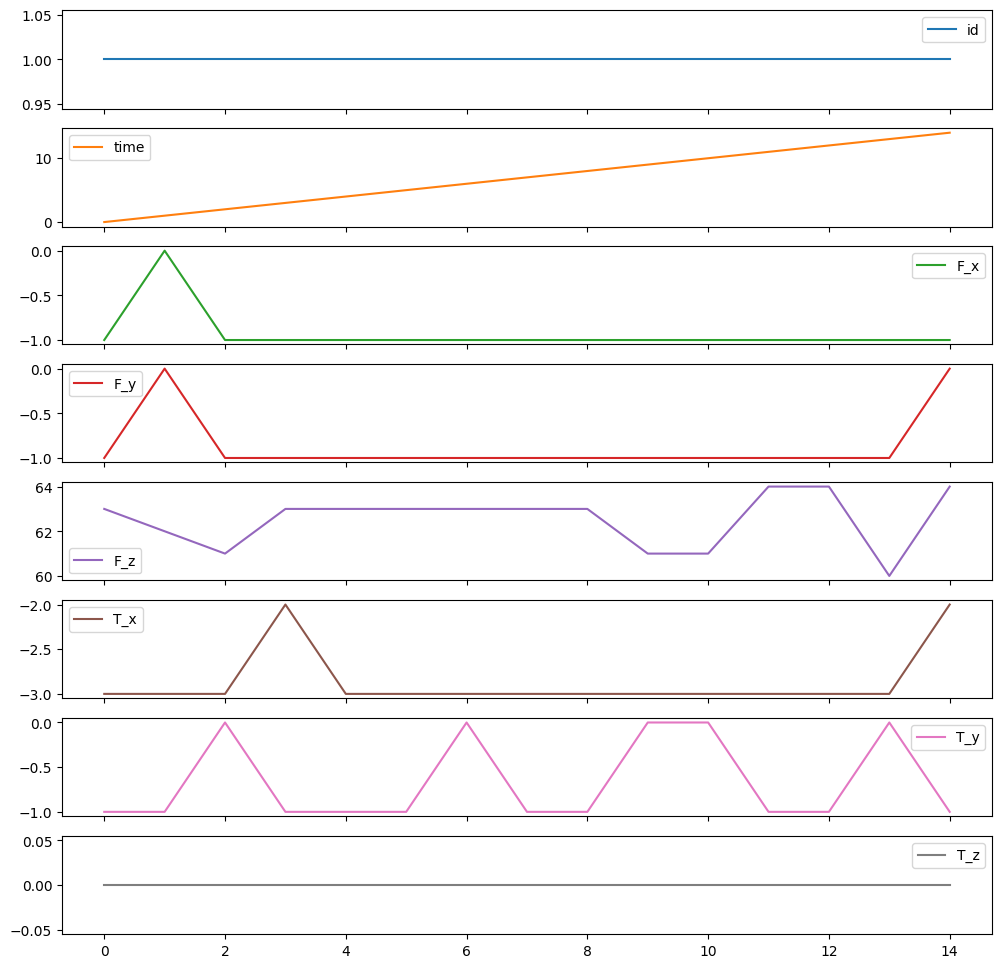

In [ ]:
import matplotlib.pyplot as plt
df[df['id'] == 1].plot(subplots=True, sharex=True, figsize=(12,12))
plt.show()


## Feature Extraction

Please refer to https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html for more details about the features generated


Steps:

Phase 1 - Feature extraction
Firstly, the algorithm characterizes time series with comprehensive and well-established feature mappings and considers additional features describing meta-information.


Phase 2 - Feature significance testing
In a second step, each feature vector is individually and independently evaluated with respect to its significance for predicting the target under investigation.  The result of these tests is a vector of p-values, quantifying the significance of each feature for predicting the label/target.


Phase 3 - Multiple test procedure
The vector of p-values is evaluated in order to decide which features to keep.

In [ ]:
from tsfresh import extract_features
features = extract_features(df, column_id="id", column_sort="time",impute_function=impute)
features

Feature Extraction: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__fourier_entropy__bins_5,T_y__fourier_entropy__bins_10,T_y__fourier_entropy__bins_100,T_y__permutation_entropy__dimension_3__tau_1,T_y__permutation_entropy__dimension_4__tau_1,T_y__permutation_entropy__dimension_5__tau_1,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1,T_y__query_similarity_count__query_None__threshold_0.0,T_y__mean_n_absolute_max__number_of_maxima_7
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.900256,1.386294,2.079442,1.230932,1.863680,2.271869,2.302585,2.197225,0.0,1.000000
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,1.494175,1.732868,2.079442,1.585771,2.369382,2.397895,2.302585,2.197225,0.0,3.285714
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,1.320888,1.906155,2.079442,1.671595,2.253858,2.397895,2.302585,2.197225,0.0,3.428571
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,1.320888,1.732868,1.906155,1.671595,2.253858,2.397895,2.302585,2.197225,0.0,3.714286
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,1.039721,1.732868,2.079442,1.671595,2.253858,2.397895,2.302585,2.197225,0.0,4.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,-232.0,4988.0,3.428571,-1.000000,-0.115385,-21.0,...,1.073543,1.386294,1.906155,1.498569,2.094729,2.271869,2.302585,2.197225,0.0,128.285714
85,1.0,0.0,1.0,1.0,-52.0,250.0,0.500000,-0.500000,0.038462,-2.0,...,1.073543,1.494175,2.079442,1.524707,2.253858,2.397895,2.302585,2.197225,0.0,7.428571
86,1.0,0.0,1.0,1.0,-81.0,885.0,1.785714,1.071429,0.269231,-8.0,...,0.376770,0.376770,1.073543,0.271189,0.286836,0.304636,0.325083,0.348832,0.0,117.857143
87,1.0,1.0,0.0,1.0,475.0,16513.0,2.500000,2.214286,-0.076923,35.0,...,0.735622,0.735622,1.073543,0.830518,1.118743,1.294545,1.497866,1.581094,0.0,459.142857


## Feature Selection



In [ ]:
from tsfresh import select_features

filtered_features = select_features(features, y)
filtered_features

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.222222,...,-0.751682,-0.310265,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,4.222222,...,0.057818,-0.202951,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,3.128889,...,0.912474,0.539121,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,7.128889,...,-0.609735,-2.641390,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,4.160000,...,0.072771,0.591927,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,53.404120,42780.0,71.428571,1563.528889,...,71.641254,38.559593,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,10.076375,1523.0,12.142857,14.755556,...,16.349699,14.429645,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,37.473546,21064.0,47.714286,2788.595556,...,71.095480,60.760842,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,143.447551,308658.0,157.285714,6415.715556,...,173.699573,109.029954,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


## Training a Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_feature_train, X_feature_test, y_train, y_test = train_test_split(features, y, test_size=.4)
X_filtered_train, X_filtered_test = X_feature_train[filtered_features.columns], X_feature_test[filtered_features.columns]

# Let’s fit the data with all the features in a decision tree model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
classifier_feature = DecisionTreeClassifier()
classifier_feature.fit(X_feature_train, y_train)
print(classification_report(y_test, classifier_feature.predict(X_feature_test)))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00        29
        True       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



We now compare it's performance with a classifier trained on the filtered data.

In [ ]:
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        29
        True       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



References:
- https://analyticsindiamag.com/a-guide-to-feature-engineering-in-time-series-with-tsfresh/

In [ ]:
!pip install transformers
